## Introduction

This code helps generate experience points (EXP) for users after they complete quizzes using TensorFlow's Deep Neural Network (DNN). The process involves loading quiz data, cleaning and preparing it, training a DNN model to predict EXP, and evaluating the model's performance. The process involves several steps as follows:

1. **Import Library & Data**: Load necessary libraries and dummy EXP datasets

2. **Exploratory Data Analysis & Pre-Processing Data**:
    - Understand data structure and clean the data by dropping unnecessary columns.
    - Split the data into features (`IS_CORRECT`, `Duration`) and target (`Exp_Gained`).
    - Split data into training and testing sets.

3. **Prediction Model Using TensorFlow DNN**:
    - Define and compile a DNN model.
    - Train the model on the training data.
    - Evaluate the model on test data and calculate performance metrics (MAE, MSE, R²).

4. **Model Implementation**:Predict EXP points for new quiz data.

5. **Saving Model**:Save the trained model in `.h5` format.

This approach personalizes learning by accurately awarding EXP points based on user's quiz performance which are considering their accuracy and duration in answering the questions.

## Import Library & Data

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import json

In [31]:
link_url = 'https://raw.githubusercontent.com/Capstone-Buddies/Machine-Learning/main/Dataset/SNBT%20Datasets%20-%20Exp_Datasets.csv'

## Exploratory Data Analysis & Pre-Processing Data

In [32]:
data = pd.read_csv(link_url)
data

,Id_quiz_history,IS_CORRECT,Duration,Exp_Gained,RandomValue,TotalRandomValue,TotalExp,Normalized_Exp
0,1,1,42,44,42,378,449,44
1,1,1,46,44,46,378,449,44
2,1,1,70,41,70,378,449,41
3,1,1,40,45,40,378,449,45
4,1,1,40,45,40,378,449,45
...,...,...,...,...,...,...,...,...
1005,101,0,74,6,39,477,201,6
1006,101,0,108,1,57,477,201,1
1007,101,0,19,6,10,477,201,6
1008,101,0,91,6,48,477,201,6


In [33]:
# Menghapus kolom yang tidak digunakan
data = data.drop(columns=['Id_quiz_history','RandomValue', 'TotalRandomValue', 'TotalExp', 'Normalized_Exp'])

# Menampilkan data setelah kolom dihapus
print("Data Setelah Kolom Dihapus:\n", data.head())

Data Setelah Kolom Dihapus:
    IS_CORRECT  Duration  Exp_Gained
0           1        42          44
1           1        46          44
2           1        70          41
3           1        40          45
4           1        40          45


In [34]:
#Melihat 10 baris terbawah dari data
data.tail(10)

,IS_CORRECT,Duration,Exp_Gained
1000,1,98,35
1001,1,166,22
1002,1,158,23
1003,1,34,45
1004,0,140,9
1005,0,74,6
1006,0,108,1
1007,0,19,6
1008,0,91,6
1009,1,13,48


In [35]:
#Mengecek jumlah kolom dan baris dari data.
data.shape

(1010, 3)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IS_CORRECT  1010 non-null   int64
 1   Duration    1010 non-null   int64
 2   Exp_Gained  1010 non-null   int64
dtypes: int64(3)
memory usage: 23.8 KB


In [37]:
#Mencari dan menangani missing values. Null
data.isnull().sum()

IS_CORRECT    0
Duration      0
Exp_Gained    0
dtype: int64

In [38]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
data.corr().style.background_gradient().format("{:.2f}")

,IS_CORRECT,Duration,Exp_Gained
IS_CORRECT,1.00,-0.04,0.94
Duration,-0.04,1.00,-0.27
Exp_Gained,0.94,-0.27,1.00


We observe that the `IS_CORRECT` feature shows a positive correlation with the target variable `Exp_Gained`, indicating that answering more questions correctly leads to higher EXP Points. Conversely, the `Duration` feature exhibits a negative correlation with `Exp_Gained`, suggesting that longer durations taken by users to answer questions result in fewer EXP Points.

In [39]:
# Memisahkan fitur (X) dan target (y)
X = data[['IS_CORRECT', 'Duration']]
y = data['Exp_Gained']

In [40]:
# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Jumlah fitur
n_features = X.shape[1]
print(n_features)

2


## Prediction Model Using TensorFlow DNN

In [42]:
# Definisikan model TensorFlow menggunakan deep neural network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_features,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [43]:
# Mengompilasi model
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mae'])

In [44]:
# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 545.1108 - mae: 18.7535 - val_loss: 538.8804 - val_mae: 19.1836
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 514.2018 - mae: 18.4961 - val_loss: 527.4202 - val_mae: 18.8247
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 503.4351 - mae: 18.3346 - val_loss: 509.3045 - val_mae: 18.5199
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 472.7154 - mae: 17.7271 - val_loss: 488.1053 - val_mae: 18.6097
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 437.2370 - mae: 16.9518 - val_loss: 493.2791 - val_mae: 18.7301
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 367.1451 - mae: 15.7241 - val_loss: 311.7113 - val_mae: 15.1089
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 230.0967 - mae: 12.6061 - val_loss: 177.8969 - val_mae: 11.1455
Epoch 8/50
23/23 [=============================

## Model Evaluation

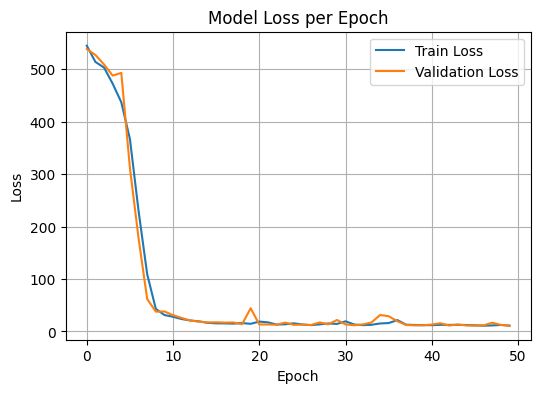

In [45]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

We can see that loss and val_loss are close to each other and converging on the graph, it indicates that the model is learning well from the training data, it suggests that the model is likely to well-generalized to new data

In [46]:
print('The MSE value is: ', model.evaluate(X_test, y_test))

10/10 [==============================] - 0s 2ms/step - loss: 10.8853 - mae: 2.2366
The MSE value is:  [10.885252952575684, 2.2366065979003906]


In [47]:
# Prediksi pada data test
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [48]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2.236606547541351


In [49]:
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 10.8852535500495


In [50]:
# Menghitung R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9631360297752134


## Model Implementation

In [51]:
# Membuat data untuk prediksi 10 data secara manual
input_data = pd.DataFrame([
    [0, 5],
    [1, 10],
    [0, 40],
    [1, 100],
    [1, 100],
    [1, 20],
    [1, 16],
    [1, 17],
    [0, 300],
    [1, 40]
], columns=['IS_CORRECT', 'Duration'])

predictions = model.predict(input_data)

1/1 [==============================] - 0s 24ms/step


In [52]:
# Menampilkan hasil prediksi
print("Data untuk prediksi:\n", input_data)
print("Hasil prediksi:\n", predictions.flatten())

Data untuk prediksi:
    IS_CORRECT  Duration
0           0         5
1           1        10
2           0        40
3           1       100
4           1       100
5           1        20
6           1        16
7           1        17
8           0       300
9           1        40
Hasil prediksi:
 [11.850856 47.381474  7.230018 35.000805 35.000805 48.320328 48.986298
 48.819805  7.770701 44.990444]


In [53]:
# Menghitung dan menampilkan jumlah dari prediksi yang diberikan
total_predictions = np.sum(predictions)
print("Jumlah dari hasil prediksi: ", total_predictions)

Jumlah dari hasil prediksi:  335.35153


In [54]:
# Mengecek jumlah keseluruhan durasi dari data input (tidak boleh lebih dari 900 detik atau 15 menit)
total_duration = input_data['Duration'].sum()
print("Jumlah keseluruhan durasi: ", total_duration)

Jumlah keseluruhan durasi:  648


## Saving Model

In [55]:
# Menyimpan model dalam bentuk JSON
# model_json = model.to_json()
# with open('model.json', 'w') as json_file:
#     json.dump(model_json, json_file)
# print("Model has been saved to model.json")

In [56]:
# Saving model in .h5 format
model.save("model_exp_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
